In [ ]:
from scipy import ndimage
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

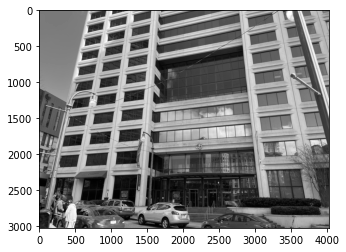

In [ ]:
#grey sclae conversion

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

img = mpimg.imread('/content/55parkplace_team2_1.png')

gray = rgb2gray(img)

plt.imshow(gray, cmap = plt.get_cmap('gray'))

plt.savefig('greyscaleimg.png')
plt.show()

In [ ]:
from PIL import Image

img = Image.open('/content/55parkplace_team2_1.png')
imgGray = img.convert('L')
imgGray.save('test_grayimg.png')

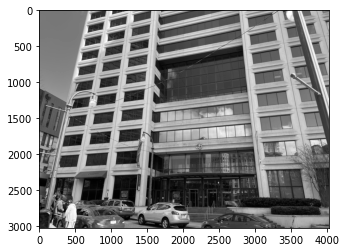

In [ ]:
#smoothing

img=imageio.imread('/content/test_grayimg.png')
img=img.astype('int32')
plt.imshow(img,cmap=plt.get_cmap('gray'))
plt.show()

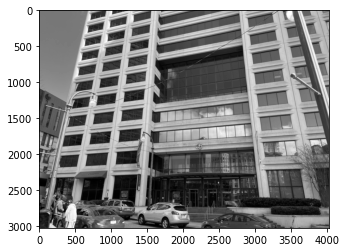

In [ ]:
#Applying gaussain filter

img_gaussian = ndimage.gaussian_filter(img, sigma= 1.4)
plt.imshow(img_gaussian ,cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
#Applying Sobel filter


def SobelFilter(img, direction):
    if(direction == 'x'):
        Gx = np.array([[-1,0,+1], [-2,0,+2],  [-1,0,+1]])
        Res = ndimage.convolve(img, Gx)
       
    if(direction == 'y'):
        Gy = np.array([[-1,-2,-1], [0,0,0], [+1,+2,+1]])
        Res = ndimage.convolve(img, Gy)
       
    return Res
def Normalize(img):
   
    img = img/np.max(img)
    return img

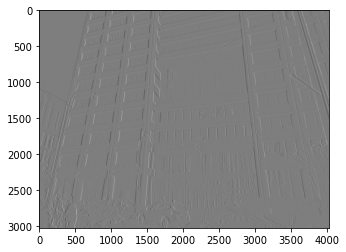

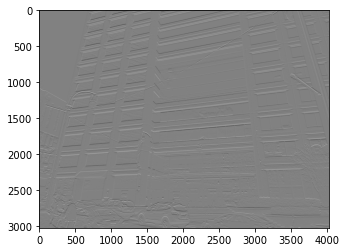

(3024, 4032)

In [ ]:
gx = SobelFilter(img_gaussian, 'x')
gx = Normalize(gx)
plt.imshow(gx, cmap = plt.get_cmap('gray'))
plt.show()
gy = SobelFilter(img_gaussian, 'y')
gy = Normalize(gy)
plt.imshow(gy, cmap = plt.get_cmap('gray'))
plt.show()
type(gx)
gx.shape

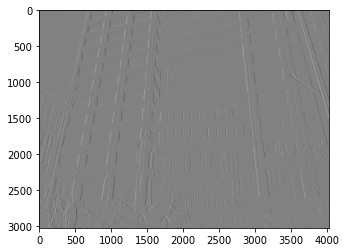

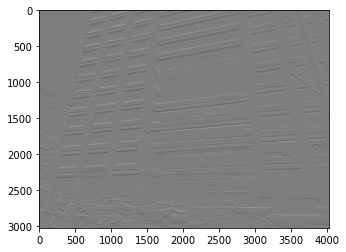

(3024, 4032)

In [ ]:
dx = ndimage.sobel(img_gaussian, axis=1) # horizontal derivative
plt.imshow(dx, cmap = plt.get_cmap('gray'))
plt.show()
dy = ndimage.sobel(img_gaussian, axis=0) # vertical derivative
plt.imshow(dy, cmap = plt.get_cmap('gray'))
plt.show()
type(dx)
dx.shape
dy.shape

In [ ]:
def convolve(img, kernel):
    """
    Convolve function for odd dimensions.
    IT CONVOLVES IMAGES
    """
    if kernel.shape[0] % 2 != 1 or kernel.shape[1] % 2 != 1:
        raise ValueError("Only odd dimensions on filter supported")

    img_height = img.shape[0]
    img_width = img.shape[1]
    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    
    pad = ((pad_height, pad_height), (pad_height, pad_width))
    g = np.empty(img.shape, dtype=np.float64)
    img = np.pad(img, pad, mode='constant', constant_values=0)
    # Do convolution
    for i in np.arange(pad_height, img_height+pad_height):
        for j in np.arange(pad_width, img_width+pad_width):
          roi = img[i - pad_height:i + pad_height +
                      1, j - pad_width:j + pad_width + 1]
          g[i - pad_height, j - pad_width] = (roi*kernel).sum()

    if (g.dtype == np.float64):
        kernel = kernel / 255.0
        kernel = (kernel*255).astype(np.uint8)
    else:
        g = g + abs(np.amin(g))
        g = g / np.amax(g)
        g = (g*255.0)
    return g

In [ ]:
def harris(img, threshold=0.6):

    img_cpy = img.copy() # copying image

    img1_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grayscaling (0-1)

    dx = convolve(img1_gray, SOBEL_X) # convolving with sobel filter on X-axis
    dy = convolve(img1_gray, SOBEL_Y) # convolving with sobel filter on Y-axis
    # square of derivatives
    dx2 = np.square(dx)
    dy2 = np.square(dy)
    dxdy = dx*dy #cross filtering
    # gauss filter for all directions (x,y,cross axis)
    g_dx2 = convolve(dx2, GAUSS)
    g_dy2 = convolve(dy2, GAUSS)
    g_dxdy = convolve(dxdy, GAUSS)
    # Harris Function
    harris = g_dx2*g_dy2 - np.square(g_dxdy) - 0.12*np.square(g_dx2 + g_dy2) # r(harris) = det - k*(trace**2)
    # Normalizing inside (0-1)
    cv2.normalize(harris, harris, 0, 1, cv2.NORM_MINMAX)

    # find all points above threshold (nonmax supression line)
    loc = np.where(harris >= threshold)
    # drawing filtered points
    for pt in zip(*loc[::-1]):
        cv2.circle(img_cpy, pt, 3, (0, 0, 255), -1)

    return img_cpy,g_dx2,g_dy2,dx,dy,loc

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
SOBEL_X = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int32")

# Sobel y-axis kernel
SOBEL_Y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int32")

# Gaussian kernel
GAUSS = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]), dtype="float64")

In [ ]:
img = cv2.imread('/content/test_grayimg.png')

corners,g_dx2,g_dy2,dx,dy,loc = harris(img,0.85)

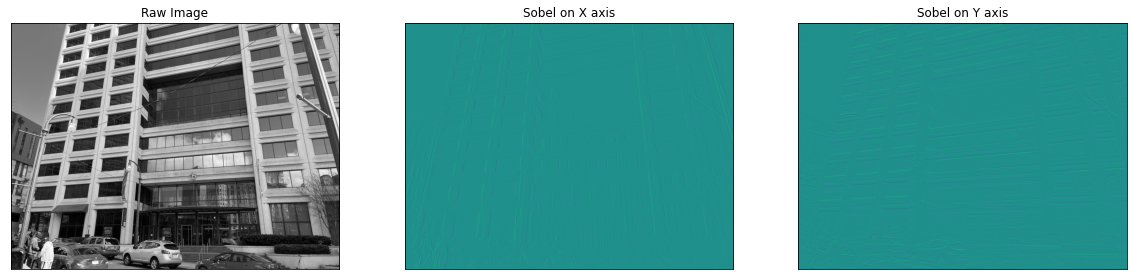

In [ ]:
 #display raw & filtered images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img)
plt.title("Raw Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dx)
plt.title("Sobel on X axis"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(dy)
plt.title("Sobel on Y axis"), plt.xticks([]), plt.yticks([])
plt.show()


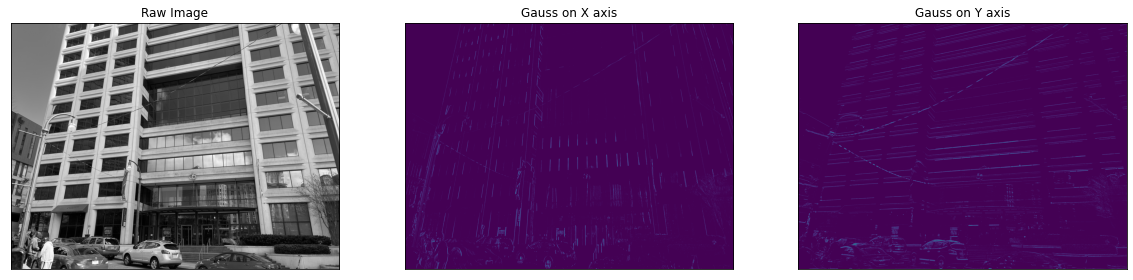

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img)
plt.title("Raw Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(g_dx2)
plt.title("Gauss on X axis"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(g_dy2)
plt.title("Gauss on Y axis"), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Harris Corner Output'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

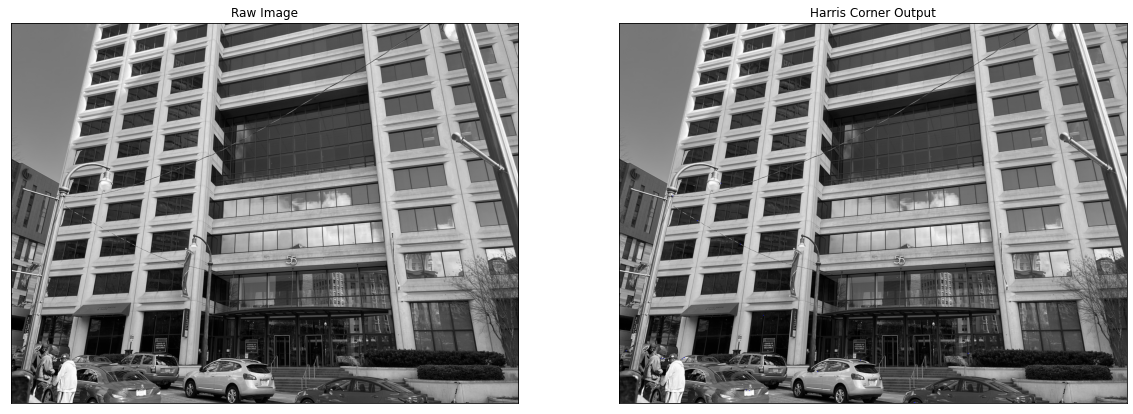

In [ ]:
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img)
plt.title("Raw Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(corners)
plt.title("Harris Corner Output"), plt.xticks([]), plt.yticks([])

In [ ]:
import argparse
import cv2
import numpy as np

In [29]:
def seperable_conv(I, filter_x, filter_y):
    h, w = I.shape[:2]
    n = filter_x.shape[0]//2
    I_a = np.zeros(I.shape)
    I_b = np.zeros(I.shape)
    for x in range(n, w-n):
        patch = I[:, x-n:x+n+1]
        I_a[:, x] = np.sum(patch * filter_x, 1)
    filter_y = np.expand_dims(filter_y, 1)
    for y in range(n, h-n):
        patch = I_a[y-n:y+n+1, :]
        I_b[y, :] = np.sum(patch * filter_y, 0)
    return I_b

In [30]:
def detect(I, n_g, n_w, k):
    h, w = I.shape
    sobel_1 = np.array([-1, 0, 1])
    sobel_2 = np.array([1, 2, 1])
    I_x = seperable_conv(I, sobel_1, sobel_2)
    I_y = seperable_conv(I, sobel_2, sobel_1)

In [32]:
def gaussian_mask(n, sigma=None):
    if sigma is None:
        sigma = 0.3 * (n // 2) + 0.8
    X = np.arange(-(n//2), n//2+1)
    kernel = np.exp(-(X**2)/(2*sigma**2))
    return kernel

def detect(I, n_g, n_w, k):
    ...
    g_kernel = gaussian_mask(n_g)
    I_x = seperable_conv(I_x, g_kernel, g_kernel)
    I_y = seperable_conv(I_y, g_kernel, g_kernel)
    D_temp = np.zeros((h,w,2,2))

In [33]:
def detect(I, n_g, n_w, k):
    ...
    D_temp = np.zeros((h,w,2,2))
    D_temp[:,:,0,0] = np.square(I_x)
    D_temp[:,:,0,1] = I_x*I_y
    D_temp[:,:,1,0] = D_temp[:,:,0,1]
    D_temp[:,:,1,1] = np.square(I_y)
    g_filter = gaussian_mask(n_w)
    g_filter = np.dstack([g_filter]*4).reshape(n_w, 2, 2)
    D = seperable_conv(D_temp, g_filter, g_filter)

In [ ]:
def my_harris(img_dir,window_size,k,threshold):

    img = cv2.imread(img_dir)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

    # Check if the image is exists
    if img is None:
        print('Invalid image:' + img_dir)
        return None
    else:
        print('Image successfully read...')
        
    height = img.shape[0]   #.shape[0] outputs height 
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image
    matrix_R = np.zeros((height,width))
    
    #   Step 1 - Calculate the x e y image derivatives (dx e dy)
    dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)
    # dy, dx = np.gradient(gray)

    #   Step 2 - Calculate product and second derivatives (dx2, dy2 e dxy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )
    #   Step 3 - Calcular a soma dos produtos das derivadas para cada pixel (Sx2, Sy2 e Sxy)
    print ("Finding Corners...")
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            #   Step 4 - Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

            #   Step 5 - Calculate the response function ( R=det(H)-k(Trace(H))^2 )
            det=np.linalg.det(H)
            tr=np.matrix.trace(H)
            R=det-k*(tr**2)
            matrix_R[y-offset, x-offset]=R
    
    #   Step 6 - Apply a threshold
    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                # cornerList.append([x, y, value])
                cv2.circle(img,(x,y),3,(0,255,0))
                
    # cv2.imwrite("%s_threshold_%s.png"%(img_dir[5:-4],threshold), img)
    plt.figure("Manually implemented Harris detector")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Manually implemented Harris detector")
    plt.xticks([]), plt.yticks([])
    plt.savefig('My_harris_detector-thresh_%s.png'%(threshold), bbox_inches='tight')
    plt.show()

    
my_harris("D:/geekering/harris.jpg", 5, 0.04, 0.30) # Change this path to one that will lead to your image

Image successfully read...
Finding Corners...


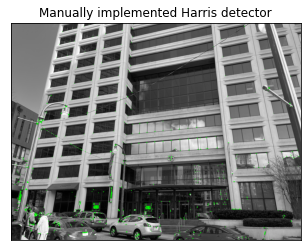

In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def my_harris(img_dir,window_size,k,threshold):

    img = cv2.imread(img_dir)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

    # Check if the image is exists
    if img is None:
        print('Invalid image:' + img_dir)
        return None
    else:
        print('Image successfully read...')
        
    height = img.shape[0]   #.shape[0] outputs height 
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image
    matrix_R = np.zeros((height,width))
    
    #   Step 1 - Calculate the x e y image derivatives (dx e dy)
    dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)
    # dy, dx = np.gradient(gray)

    #   Step 2 - Calculate product and second derivatives (dx2, dy2 e dxy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )
    #   Step 3 - Calcular a soma dos produtos das derivadas para cada pixel (Sx2, Sy2 e Sxy)
    print ("Finding Corners...")
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            #   Step 4 - Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

            #   Step 5 - Calculate the response function ( R=det(H)-k(Trace(H))^2 )
            det=np.linalg.det(H)
            tr=np.matrix.trace(H)
            R=det-k*(tr**2)
            matrix_R[y-offset, x-offset]=R
    
    #   Step 6 - Apply a threshold
    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                # cornerList.append([x, y, value])
                cv2.circle(img,(x,y),3,(0,255,0))
                
    # cv2.imwrite("%s_threshold_%s.png"%(img_dir[5:-4],threshold), img)
    plt.figure("Manually implemented Harris detector")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("Manually implemented Harris detector")
    plt.xticks([]), plt.yticks([])
    plt.savefig('My_harris_detector-thresh_%s.png'%(threshold), bbox_inches='tight')
    plt.show()

my_harris("/content/test_grayimg.png", 5, 0.04, 0.25) # Change this path to one that will lead to your image